In [24]:
import psycopg2 as pg
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, ion, show
import numpy as np
import sys
ion()


In [25]:
con = pg.connect("host='data-challenge.cpzsedc9pony.us-west-2.redshift.amazonaws.com' dbname='dev' user='' port='' password=''")


In [26]:
cur = con.cursor()


In [27]:
cur.execute("""select eventname,count(*) from ios_events group by eventname""")


In [28]:
row_share_search = cur.fetchall()
rarray = np.array(row_share_search)
row_search=rarray[0,1].astype(np.float)
row_share=rarray[1,1].astype(np.float)
print (row_share_search[0][0]+"=" + str(row_search) )

textsearch=34262927.0


In [29]:
print (row_share_search[1][0]+"=" + str(row_share) )


share=22512088.0


In [30]:
share_ra=row_share/(row_search+row_share)
print("share rate = " + str(share_ra))


share rate = 0.396513994756


In [31]:

cur.execute("""select tags ,eventname, count(*) as "Shared rates 
of tags" from ios_events where ios_events.category='search' 
and ios_events.eventname='share' group by tags,eventname 
order by count(*) DESC limit 1000""")


In [32]:
most_search=cur.fetchall()
m_s_array = np.array(most_search)
share_rate_top1000=[]

In [33]:
for ii in range(len(most_search)):
    share_rate_top1000.append(m_s_array[ii,2].astype(np.float)/row_share)
#    print (share_rate_top1000[ii])


In [34]:
print (share_rate_top1000[2])



0.00328810015313


In [35]:
cur.execute("""select count(Distinct tags) from ios_events""")
distincst_tags=cur.fetchall()
No_dist_tags=(np.array(distincst_tags)).astype(np.float)[0][0]
print ("Number of unique search terms=" + str(No_dist_tags))


Number of unique search terms=2729143.0


In [36]:
%matplotlib inline

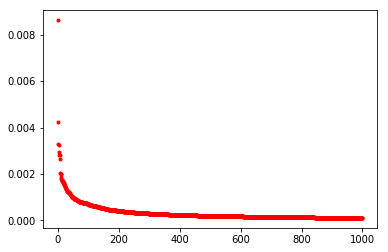

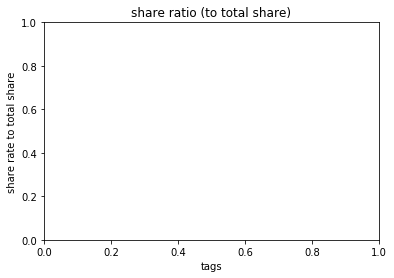

In [37]:
plt.figure(0)
plt.plot(share_rate_top1000, '.' , color='red')
plt.show()
plt.title('share ratio (to total share)')
plt.xlabel('tags')
plt.ylabel('share rate to total share')
#plt.savefig('share.pdf',format='pdf')


In [38]:
distinct_gif=cur.fetchall()
No_dist_gif=(np.array(distinct_gif)).astype(np.float)[0][0]
print ("Number of unique gifs =" + str(No_dist_gif))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
cur.execute("""select riffid,count(*) from ios_events group by riffid order by count(*) DESC limit 2000""")
gif_counts=cur.fetchall()
gif_count_array=[]

In [ ]:
for ii in range(len(gif_counts)):
        gif_count_array.append((np.array(gif_counts)).astype(np.float)[ii][1])

In [ ]:
%matplotlib inline
plt.figure(1)
plt.plot(gif_count_array[1:], '.', color = "blue")
plt.title('count for diff gifs')
plt.xlabel('gifs')
plt.ylabel('gif counts for the first 2000 top')
#plt.savefig('gif.pdf',format='pdf')


In [ ]:
cur.execute("""create table newtablepython as 
                select *,case when EXTRACT('EPOCH' FROM timestamp)- EXTRACT('EPOCH' FROM last_event) >= (60) 
                OR last_event IS NULL then 1 else 0 end as session_start 
                FROM (SELECT *,LAG(timestamp) OVER (PARTITION BY keyboardid ORDER BY timestamp) AS last_event 
                FROM ios_events) last""")


In [ ]:
cur.execute("""create table NewBigTablepython as 
                SELECT *, SUM(session_start) 
                OVER (partition by keyboardid order by timestamp rows between unbounded preceding and current row ) 
                AS user_search_session_id ,   
                SUM(session_start) 
                OVER (ORDER BY keyboardid, timestamp rows between unbounded preceding and current row) 
                AS all_search_session_ids 
                FROM newtablepython""")
